# Performances: Generalization, Regularization

In [12]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fmin, minimize

1) Try to fit the following data with a straight line(y=mx+c). Plot data points along with actual function and your line.

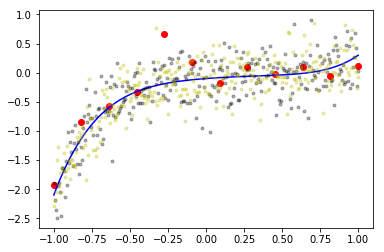

In [122]:
np.random.seed(7777)
ndata = 12
z = [0.6, -0.5, 0.4, -0.3, 0.2, -0.1]
a,b,c,d,e,f = z
noise = 0.3
xs = np.linspace(-1, 1, ndata)
tx = xs
ys = (a*tx**5 + b*tx**4 + c*tx**3 + d*tx**2 + e*tx + f) + np.random.randn(ndata)*noise
actualxs = np.linspace(-1,1,100)
tx = actualxs
actualys = (a*tx**5 + b*tx**4 + c*tx**3 + d*tx**2 + e*tx + f)

ntest = 300
testxs = np.linspace(-1,1,ntest)
tx = testxs
testys = (a*tx**5 + b*tx**4 + c*tx**3 + d*tx**2 + e*tx + f) + np.random.randn(ntest)*noise

ntest = 300
validxs = np.linspace(-1,1,ntest)
tx = testxs
validys = (a*tx**5 + b*tx**4 + c*tx**3 + d*tx**2 + e*tx + f) + np.random.randn(ntest)*noise

plt.plot(xs, ys,'or')
plt.plot(actualxs, actualys,'b')
plt.plot(testxs, testys, '.k', alpha=0.3)
plt.plot(validxs, validys, '.y', alpha=0.3)

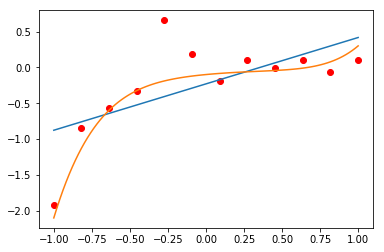

In [14]:
#put your code here

def guess(w, x):
    m, c = w
    return m*x + c

def cost(w):
    return sum((yy - guess(w,xx))**2 for xx, yy in zip(xs, ys))/len(xs)
    
w = minimize(cost, [0,0]).x

newx = np.linspace(-1, 1, 100)
newy = [guess(w, xx) for xx in newx]
plt.plot(xs, ys, 'or')
plt.plot(newx, newy)
plt.plot(actualxs, actualys)

2) What is your in-sample error? $E_{in}$

3) What is your out-sample error? $E_{out}$

4) Between $E_{in}$ and $E_{out}$
- Which one do we really want to optimize? 
- Which one do we actually optimize when we train our model?

5) Now Try fit it with polynomial degree 2 ($ax^2 + bx + c)$. Same deal, plot, find $E_{in}$ and $E_{out}$. (Think about a generic function that does this for any number of degree)

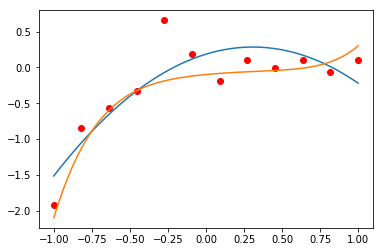

In [15]:
#put your code here

def guess(w, x):
    a, b, c = w
    return a*x**2 + b*x + c

def cost(w):
    return sum((yy - guess(w,xx))**2 for xx, yy in zip(xs, ys))/len(xs)
    
w = minimize(cost, [0]*3).x

newx = np.linspace(-1, 1, 100)
newy = [guess(w, xx) for xx in newx]
plt.plot(xs, ys, 'or')
plt.plot(newx, newy)
plt.plot(actualxs, actualys)

In [ ]:
#Straight line fit 
#Bad in the training data -> In of Sample error 
#Bad in the test data -> Out of sample error 

6) Try it with degree 3, 4, 5 ... 11. Can you explain what happen at degree 11?

<span style="color:red;"> DO NOT COPY PASTE codes. Write a function and use for loop </span>

In [123]:
def make_guess(n):
    def guess(x,w):
        return np.dot([x**i for i in range(n+1)],w)
    return guess 

def make_cost(xs, ys, cost):
    def cost(w):
        return sum((guess(x,w) - y)**2 for x,y in zip(xs,ys))
    return cost

for i in range(11+1):
    guess = make_guess(i)
    cost = make_cost(xs, ys, guess)
    res = minimize(cost, [0]*(i+1))
    w = res.x
    newx = np.linspace(-1, 1, 100)
    newy = [guess(x, w) for x in newx]
#     print(w)
#     plt.figure()
#     plt.plot(xs, ys, 'or')
#     plt.plot(newx, newy)
#     plt.plot(actualxs, actualys)
#     plt.plot(testxs, testys, '.k', alpha=0.3)
#     plt.title("Degree %d" %i)

7) Now plot polynomial degree vs $E_{in}$ and degree vs $E_{out}$



8) Explain why you see the graph you see in above.

- What's wrong with model that is too simple
- What's wrong with model that is too complex

In [ ]:
#wrong guess is bad
#large w is bad 1

# Regularization.

1) Print $w$ from those degree 11 polynomial model. What went wrong with overly complex model?

2) How should we penalize the model to prevent overly complex model?

In particular, what is does the penalized cost function looks like?

3) What happen if our penalty is too small? What happend if our penalty is too big?

4) If $\lambda$ is small do we expect to get complex or simple model? Why?

5)Try Regularize with $\lambda=1\times10^{-8}$, $\lambda=0.01$ and $\lambda=100$

min error out  0.12869389858429195
min error in  0.0017503401651111049


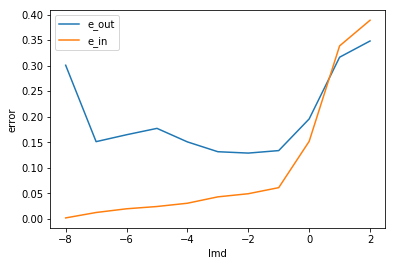

In [121]:
def make_guess(n):
    def guess(x,w):
        return np.dot([x**i for i in range(n+1)],w)
    return guess 

def make_cost(xs, ys, cost, lmd):
    def cost(w):
        return sum((guess(x,w) - y)**2 for x,y in zip(xs,ys))/len(xs) + lmd*sum(w[1:]**2)
    return cost

def cal_error(actualy, guessy):
    return sum((ay-gy)**2 for ay,gy in zip(actualy,guessy))/len(actualy)

def make_error(xs, ys, guess):
    return make_cost(xs, ys, guess, 0)

ws = []
for lmd in [10**i for i in range(-8,3)]:
    guess = make_guess(11)
    cost = make_cost(xs, ys, guess, lmd)
    res = minimize(cost, [0]*(i+1))
    w = res.x
    ws.append([lmd,w])

guess = make_guess(11)    
error_out = make_error(testxs,testys,guess)
error_in = make_error(xs,ys,guess)
lmd = [l for l,x in ws]
err_out = [error_out(w) for l,w in ws]
err_in = [error_in(w) for l,w in ws]
plt.plot(np.log(lmd)/np.log(10), err_out, label = 'e_out')
plt.plot(np.log(lmd)/np.log(10), err_in, label = 'e_in')
plt.xlabel("lmd")
plt.ylabel("error")
plt.legend()

#     guessy = [guess(x, w) for x in testxs]
#     err = cal_error(testxs, guessy)
#     print("lmd", lmd,err)
#     plt.plot(lmd,err, 'or')
    
#     plt.figure()    
#     plt.plot(xs, ys, 'or')
#     plt.plot(newx, newy)
#     plt.plot(actualxs, actualys)
#     plt.plot(testxs, testys, '.k', alpha=0.3)
#     plt.title("$\lambda$= %e"%lmd)
    
print("min error out ", np.min(err_out))
print("min error in ", np.min(err_in))

In [86]:
#why you should not use 0.12 error 
#because bias against the noise 

6) Sketch by hand E_in and Eout vs $\lambda$. Then, Try plotting log(1/lambda) vs Ein and Eout.

test_error 0.12869389858429195
validation_error 0.11982556433845847


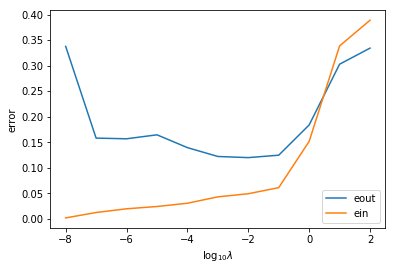

In [124]:
def make_guess(n):
    def guess(x, w):
        return np.dot([x**i for i in range(n+1)], w)
    return guess

def make_cost(xs, ys, guess, l):
    def cost(w):
        w = np.array(w)
        return sum((guess(x, w) - y)**2 for x,y in zip(xs, ys))/len(xs) + l*sum(w[1:]**2)
    return cost

def make_error(xs, ys, guess):
    return make_cost(xs, ys, guess, l=0)

guess = make_guess(11)
error_out = make_error(validxs, validys, guess)
error_in = make_error(xs, ys, guess)
lambdas = [l for l, w in ws]
eout = [error_out(w) for l, w in ws]
ein = [error_in(w) for l, w in ws]
plt.plot(np.log(lambdas)/np.log(10), eout, label='eout')
plt.plot(np.log(lambdas)/np.log(10), ein, label='ein')
plt.ylabel('error')
plt.xlabel('$\log_{10} \lambda$')
plt.legend()

best_l = lambdas[np.argmin(eout)]
best_w = ws[np.argmin(eout)][1]
error_test = make_error(testxs, testys, guess)
print('test_error', error_test(best_w))
print('validation_error', error_out(best_w))
# for i, w in ws:
#     print(i, error(w))

# Model Selection

1) Why don't  we just use every single data to train?

In [ ]:
#separate into train -> w, validation -> lmd, test 

2) What is validation data set for?

3) Why can't use validation set to report the expected out of sample performance?

4) What is test data set for?

5) What's wrong if we use too much data set for validation and test sample?

# Logistic regression revisited

(if we have time if not it's your hw)

Combine what we just learned so far and build a classifier for this data

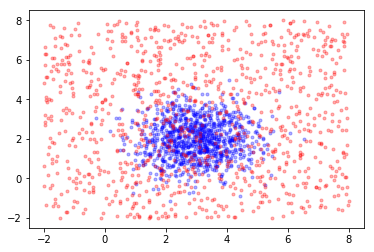

In [137]:
class1 = np.zeros((1000,3))
class1[:, 0] = 1.
class1[:, 1] = np.random.randn(1000)+3
class1[:, 2] = np.random.randn(1000)+2

class2 = np.zeros((1000,3))
class2[:, 0] = -1
class2[:, 1] = np.random.random(1000)*10-2
class2[:, 2] = np.random.random(1000)*10-2

data = np.concatenate([class1, class2])

class1idx = data[:,0] == 1

class2idx = data[:,0] == -1

plt.plot(data[class1idx, 1], data[class1idx, 2], '.b', alpha=0.3)
plt.plot(data[class2idx, 1], data[class2idx, 2], '.r', alpha=0.3)
# print(data)

In [130]:
def expander(max_deg):
    def expand(xs):
        n = len(xs)
        ret = []
        for total_deg in range(0,max_deg+1):
            for i in range(total_deg+1):
                j = total_deg -i
                x = xs[0]**i*xs[1]**j
                #print(i,j,x)
                ret.append(x)
        return ret
    return expand
# expander(4)([2,3])# [x1,x2] -> [1, x2, x1, x2**2, x2x1, x1**2, ...., x1**4]    

In [169]:
expanded_data = np.array([expander(4)(d[1:]) for d in data])
mask = np.random.random(len(expanded_data))
train_mask = (mask < 0.7)
valid_mask = (mask > 0.7) & (mask < 0.85)
test_mask = (mask > 0.85)

train = expanded_data[train_mask]
train_y = train[:,0]
valid = expanded_data[valid_mask]
valid_y = valid[:,0]
test = expanded_data[test_mask]
test_y = test[:,0]
# print(len(train), len(valid), len(test))
# print(valid[:5])

In [177]:
from scipy.optimize import minimize

class logisticRegression: 
    def __init__(self,xs,ys,n,lmd):
        self.w = self.train(xs,ys,lmd)
#         self.xs = xs
        
    def theta(self, z):                            #logistic function
        return 1/(1+np.exp(-z))
        
    def train(self, xs, ys,lmd):
        def cost(w):
            wx = np.dot(xs,w)
            ywx = ys * wx
            lh = np.log(self.theta(ywx))           #calculate likelihood 
            logistic = -(np.sum(lh))/ len(xs)
            reg = lmd*sum(w[1:]**2)
            return logistic + reg
        w = minimize(cost, [0.]*xs.shape[1]).x     #gradient descent 
        return w 
    
    def prob(self,x):
        wx = np.dot(self.expander(4)[x],w)
        return self.theta(wx)
    
    def classify(self, x):
        return self.theta(np.dot(x,self.w))

In [178]:
log = logisticRegression(train,train_y, 4,0)
log.w

array([ 6.54296744, -0.1735479 , -0.10395613,  2.6484214 , -0.47888503,
        3.43782831, -0.51470227,  0.16716485, -0.2015401 , -0.09191905,
        1.0474647 , -1.48809973,  0.58377172, -1.2565691 ,  1.63884091])

In [1]:
def theta(s):
    return 1/(1+np.exp(-np.clip(s, -50,50)))
class LogisticRegression:
    def __init__(self, xs, ys, n, l):
        self.xs = xs
        self.ys = ys
        self.l = l
        self.exs = expander(n)(xs)
        self.w = self.train()
        self.n = n
        
    def train(self):
        print(self.xs.shape, self.ys.shape)
        def cost(w):
            reg = self.l*np.sum(w[1:]**2)
            logistic = -np.sum(np.log(theta(self.ys*np.dot(self.xs, w))))/len(self.xs)
            return logistic + reg
        print([0]*self.xs.shape[1])
        res = minimize(cost,[0]*self.xs.shape[1])
        return res.x
    
    def prob(self, x):
        return theta(np.dot(expander(self.n)(x), self.w))
    
    def plot_contour(self):
        xs = np.linspace(-2, 8, 100)
        ys = np.linspace(-2, 8, 100)
        z = np.zeros((100,100))
        for ix, x in enumerate(xs):
            for iy, y in enumerate(ys):
                z[iy, ix] = self.prob(np.array([x, y]))
        plt.contour(xs, ys, z, levels=[0.3, 0.5, 0.7])

In [2]:
logis = LogisticRegression(train, train_ys, 4, l=0.01)

NameError: name 'train' is not defined